In [1]:
# Importing necessary liabraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
df = pd.read_csv('loan_prediction.csv')

In [3]:
# Finding shape of dataset
df.shape

(614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Finding duplicate values present in dataset 
df.duplicated().sum()

0

In [8]:
# Finding missing values present in dataset 
missing_values = df.isnull().sum().sort_values(ascending=False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis=1, keys=['Missing Values', '% Missing Data']))

                   Missing Values  % Missing Data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


In [9]:
# Enlisting value counts and sub categories of different categorical features available
categories = ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']

for i in categories:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


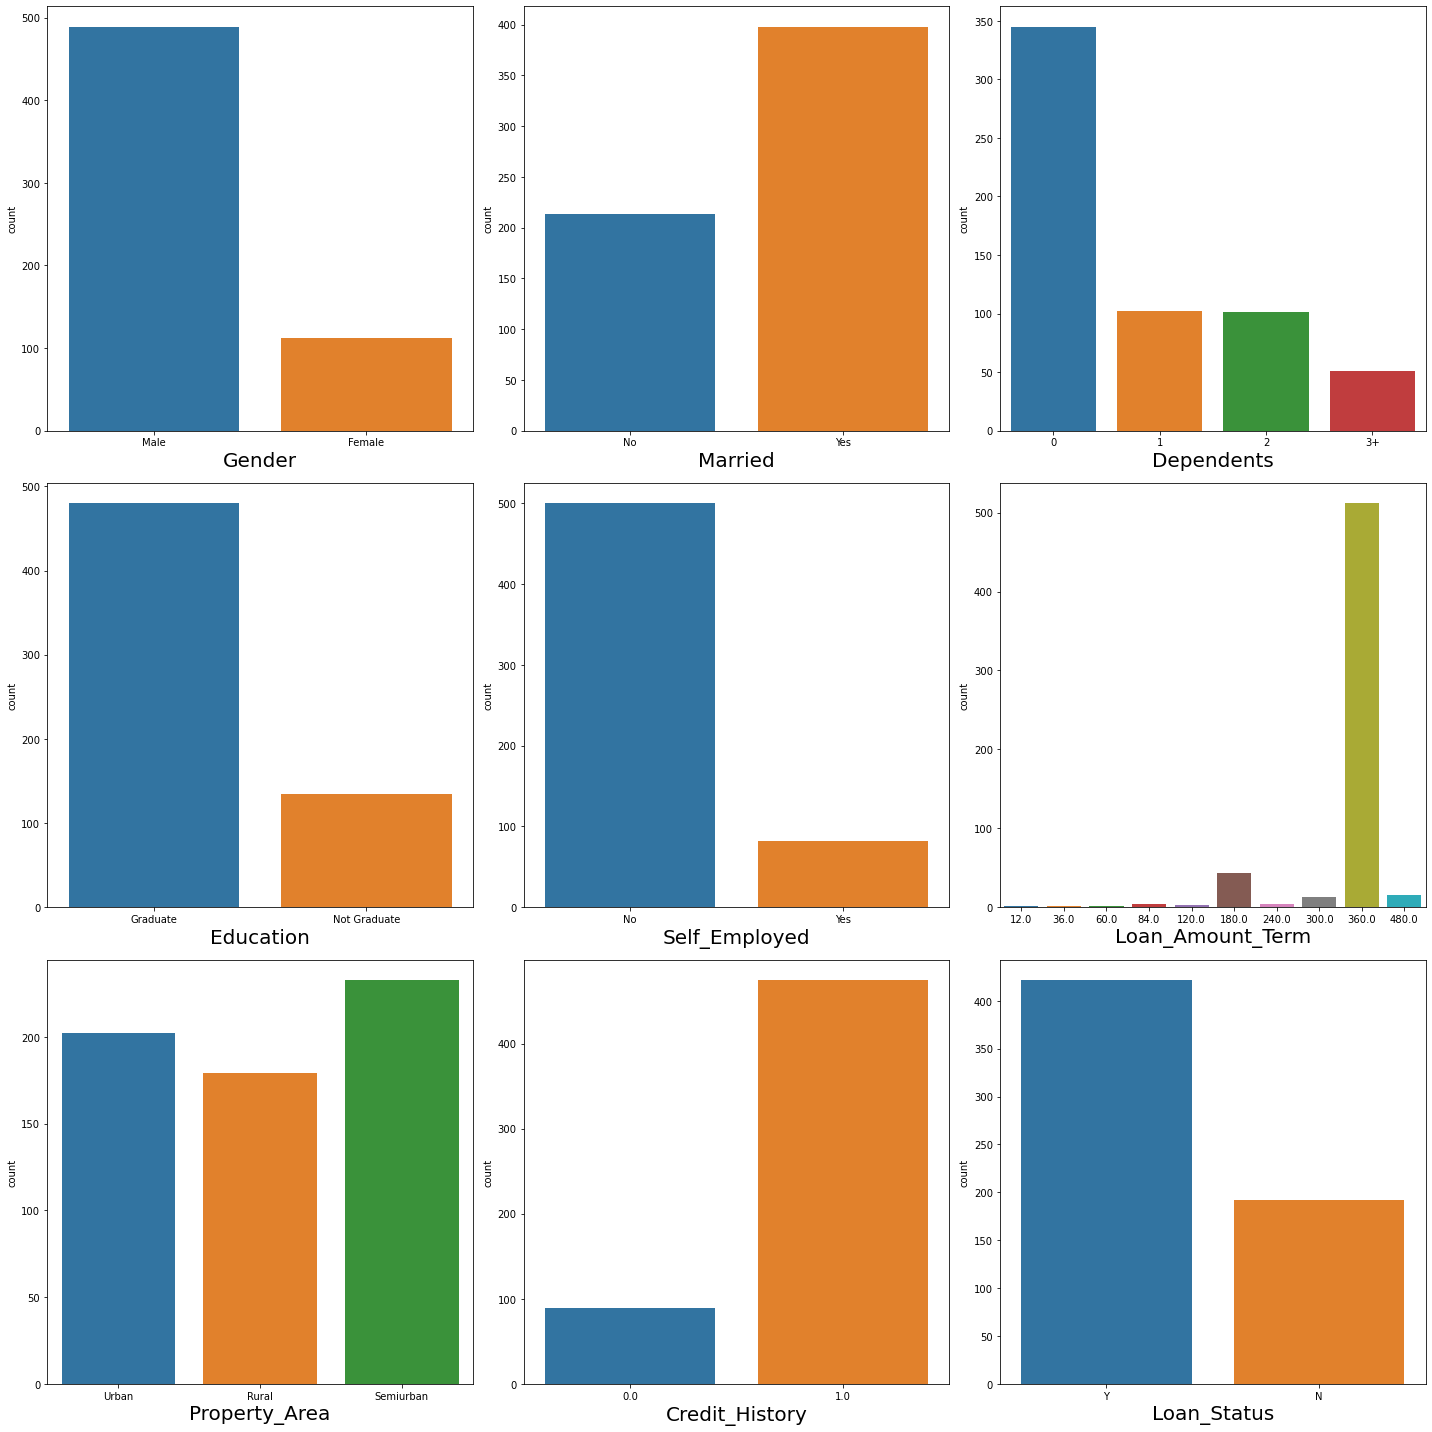

In [10]:
sns.set_palette('tab10')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber=1
categories=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']

for i in categories:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber +=1
plt.tight_layout()
plt.show()

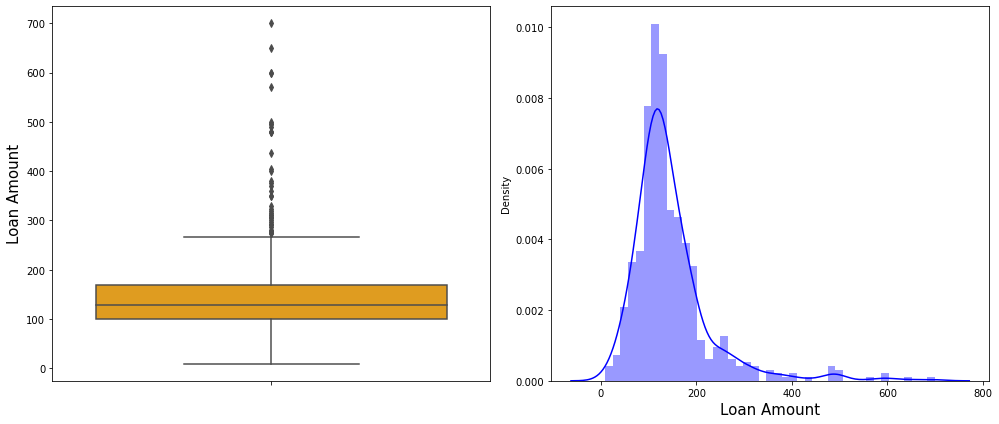

In [11]:
# Checking outliers for missing values numerical variable having missing values by plotting boxplot

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y='LoanAmount', data=df, color='orange')
plt.ylabel('Loan Amount', fontsize=15)
plt.subplot(1,2,2)

sns.distplot(df['LoanAmount'], color='blue')
plt.xlabel('Loan Amount', fontsize=15)
plt.tight_layout()
plt.show()

In [12]:
# Finding mean and median of loan amount column
print('Mean of Loan Amount:', df['LoanAmount'].mean())
print('Median of Loan Amount:', df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


In [13]:
# Imputing the missing values
# We will impute LoanAmount with median 
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Imputing Loan Amount Term with mode because maximum loan term is 360 Months
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [14]:
# Imputing the missing values with mode for categorical features

df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [15]:
# Checking missing values after imputation

missing_values = df.isnull().sum().sort_values(ascending=False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis=1, keys=['Missing Values', '% Missing Data']))

                   Missing Values  % Missing Data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


In [16]:
# Observing the statistical measure of dataset

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:>

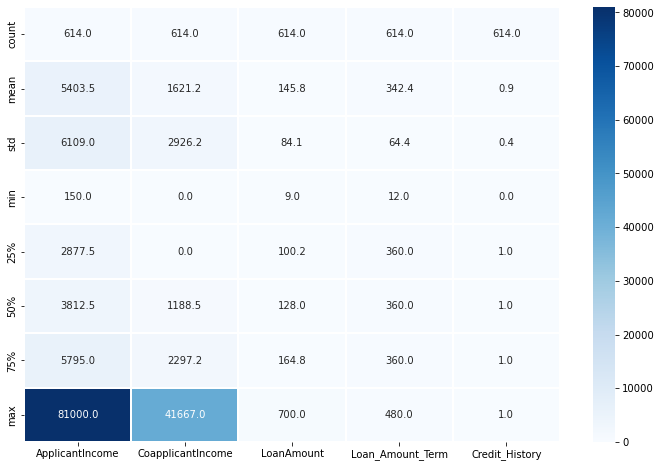

In [17]:
# Visualizing the statistics of the columns using heatmap.

plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='Blues')

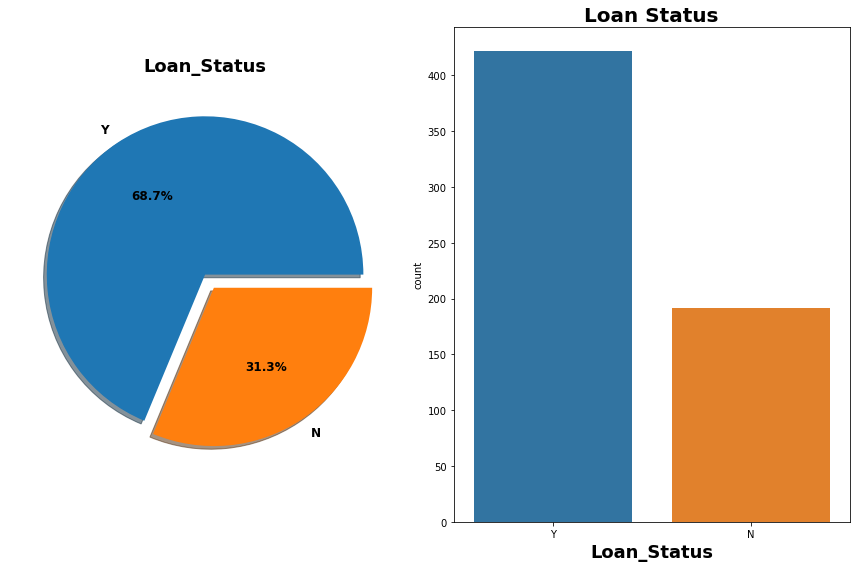

In [18]:
# Finding the relationship between target and independent features

# Loan Status

plt.rcParams['figure.autolayout']=True
sns.set_palette('tab10')
f, ax=plt.subplots(1,2,figsize=(12,8))
df['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%', textprops= {'fontweight':'bold','fontsize': 12},ax=ax[0],shadow=True)
ax[0].set_title('Loan_Status',fontsize=18, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Loan_Status', data=df, ax=ax[1])
ax[1].set_title('Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel('Loan_Status', fontsize=18, fontweight='bold')
plt.show()


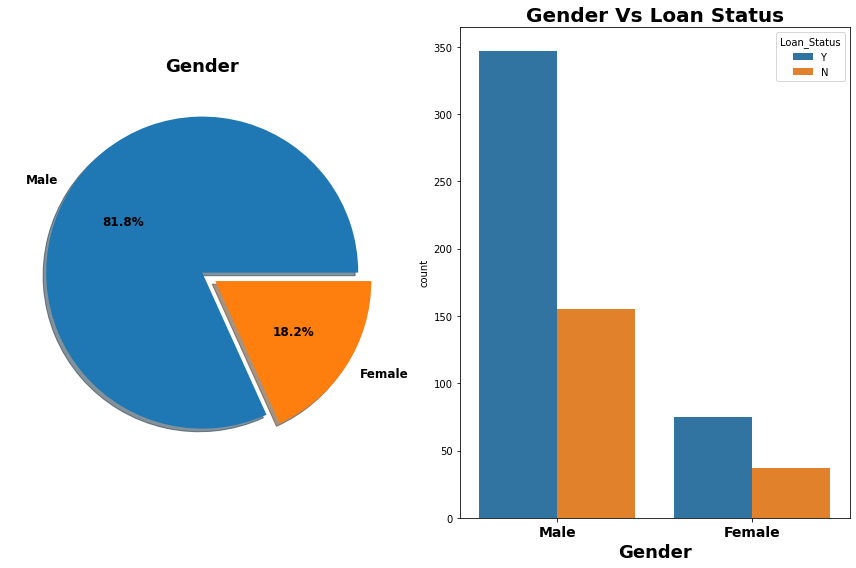

In [19]:
# Gender vs loan Status

plt.rcParams['figure.autolayout']=True
sns.set_palette('tab10')
f, ax=plt.subplots(1,2,figsize=(12,8))
df['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%', textprops= {'fontweight':'bold','fontsize': 12},ax=ax[0],shadow=True)
ax[0].set_title('Gender',fontsize=18, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Gender',hue='Loan_Status', data=df, ax=ax[1])
ax[1].set_title('Gender Vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel('Gender', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [20]:
pd.crosstab(df['Gender'],df['Loan_Status'], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


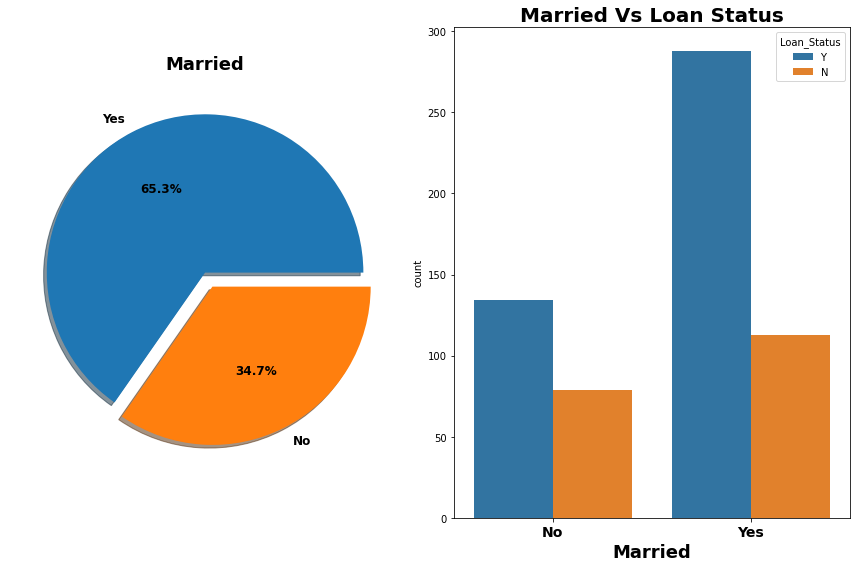

In [21]:
# Married Vs Loan Status

plt.rcParams['figure.autolayout']=True
sns.set_palette('tab10')
f, ax=plt.subplots(1,2,figsize=(12,8))
df['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%', textprops= {'fontweight':'bold','fontsize': 12},ax=ax[0],shadow=True)
ax[0].set_title('Married',fontsize=18, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Married',hue='Loan_Status', data=df, ax=ax[1])
ax[1].set_title('Married Vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel('Married', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [22]:
pd.crosstab([df['Gender'],df['Married']],df['Loan_Status'], margins=True).style.background_gradient(cmap='summer_r')

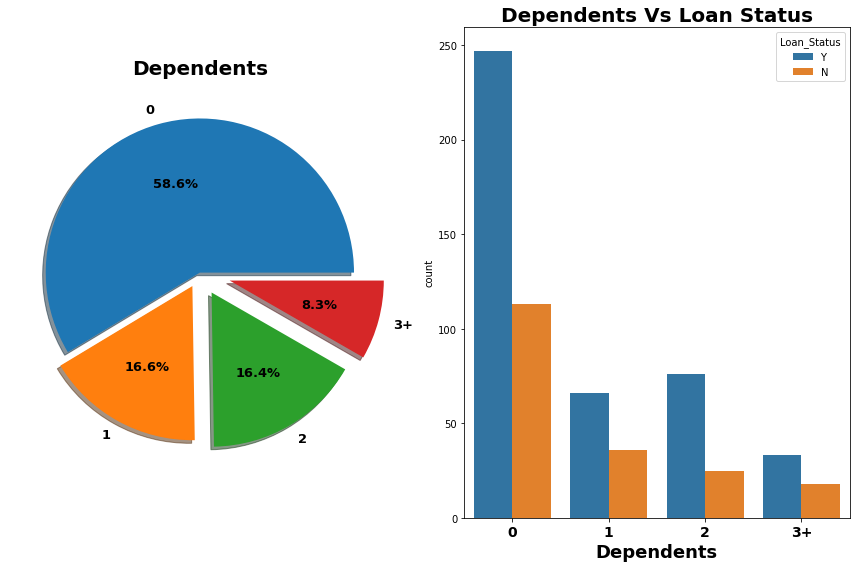

In [23]:
# Number of dependents Vs Loan Status

plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
f,ax=plt.subplots(1,2,figsize=(12,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Dependents', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Dependents Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [24]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True).style.background_gradient(cmap='summer_r')

In [25]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='summer_r')

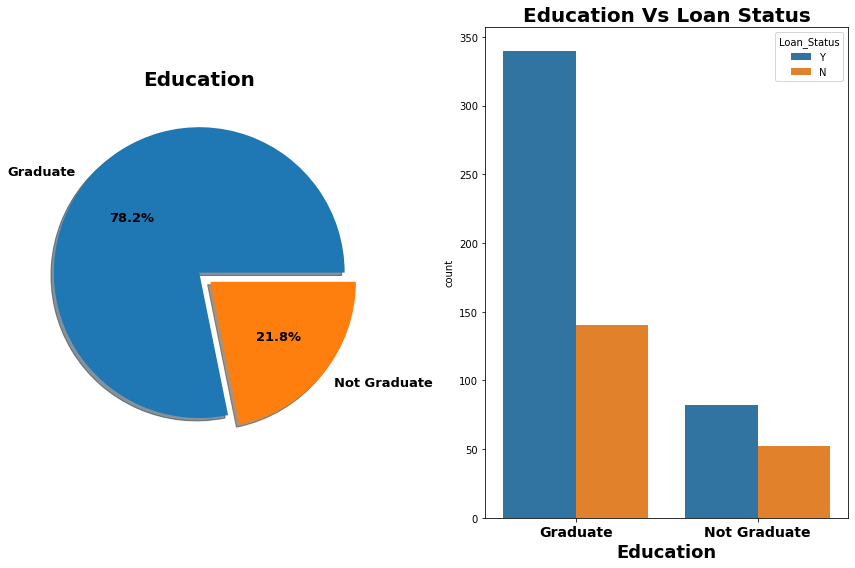

In [26]:
# Education Vs Loan Status

plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
f,ax=plt.subplots(1,2,figsize=(12,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Education',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()


In [27]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [28]:
# Encoding of the categorical data

categories = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [29]:
# Encoding categorical data with Label Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in categories:
    df[i]=le.fit_transform(df[i])

df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,3+,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [30]:
# Outliers detection and removal

Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

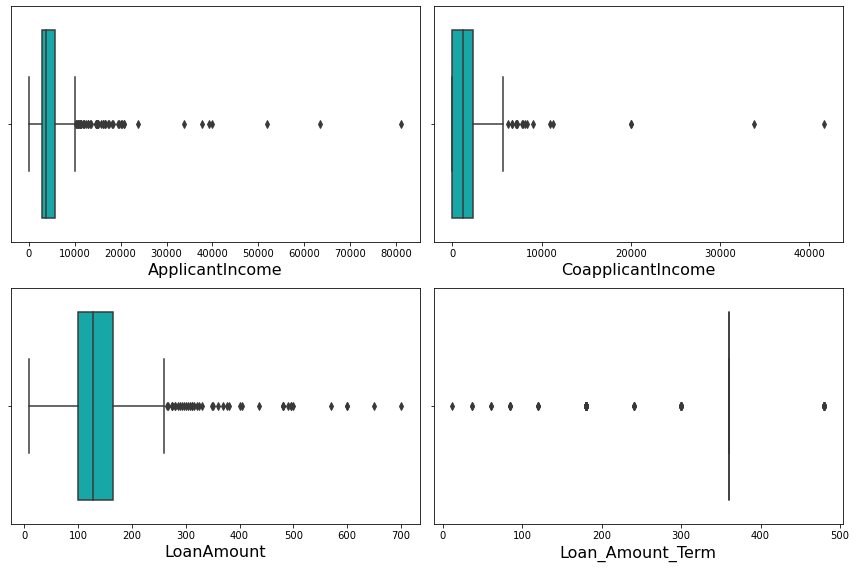

In [31]:
plt.figure(figsize=(12,8), facecolor = 'white')
plotnumber=1

for column in Numerical:
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column], color='c')
        plt.xlabel(column, fontsize=16)
    plotnumber +=1
plt.tight_layout()
plt.show()

In [32]:
# Dropping unnecessary columns
df.drop(['Loan_ID'], axis=1, inplace=True)
df['Dependents']=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents']= pd.to_numeric(df['Dependents'])

In [33]:
# Removing outliers

from scipy.stats import zscore

In [34]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print('Shape of data before removing outliers:', df.shape)
print('Shape of data after removing outliers:', df1.shape)
print('Data loss after removing outliers:', (df.shape[0]-df1.shape[0])/df.shape[0]*100)


df = df1.copy()

Shape of data before removing outliers: (614, 12)
Shape of data after removing outliers: (577, 12)
Data loss after removing outliers: 6.026058631921824


In [35]:
# Finding features are they normally distributed?

df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

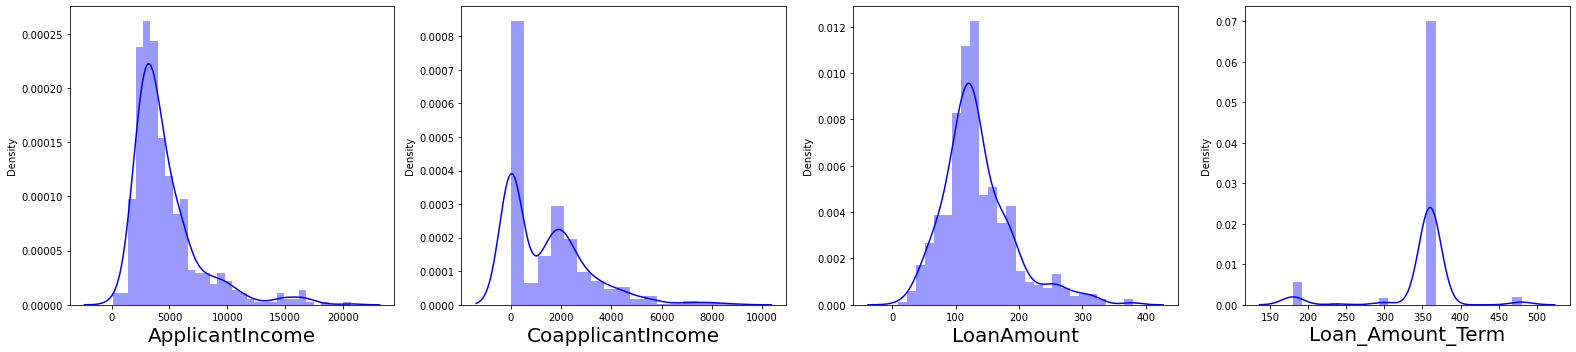

In [36]:
# Plotting the Features

plt.figure(figsize=(22,5), facecolor='white')
plotnum =1

for col in Numerical:
    if plotnum <=4:
        plt.subplot(1,4, plotnum)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnum +=1
plt.show()

In [37]:
# Removing skewness using yeo-johnson method to get better prediction
# Importing Necessary Liabrary

skew=['ApplicantIncome','CoapplicantIncome','LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler =PowerTransformer(method='yeo-johnson')

In [38]:
df[skew]= scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


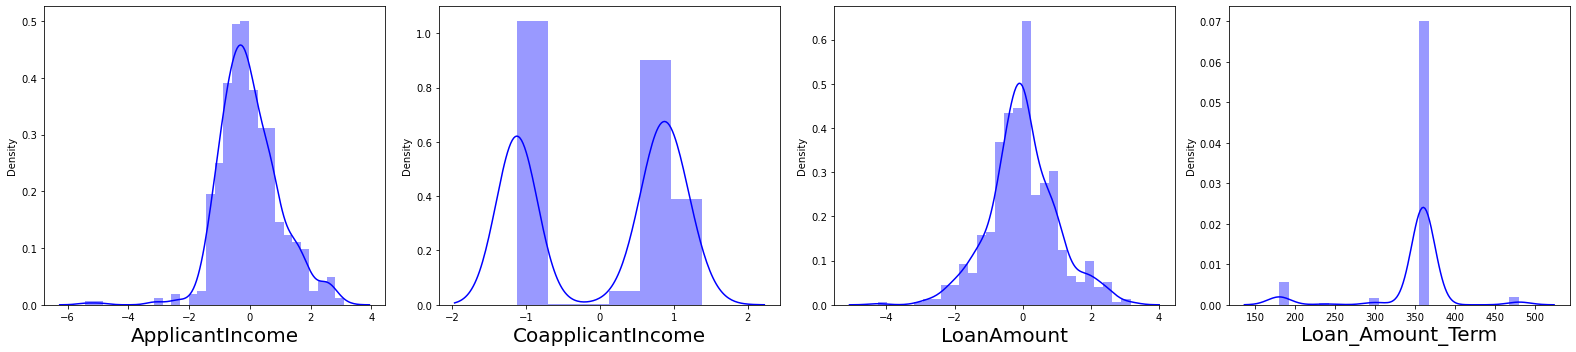

In [39]:
plt.figure(figsize=(22,5), facecolor='white')
plotnum =1

for col in Numerical:
    if plotnum <=4:
        plt.subplot(1,4, plotnum)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnum +=1
plt.show()

In [40]:
# Finding correlation 

df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


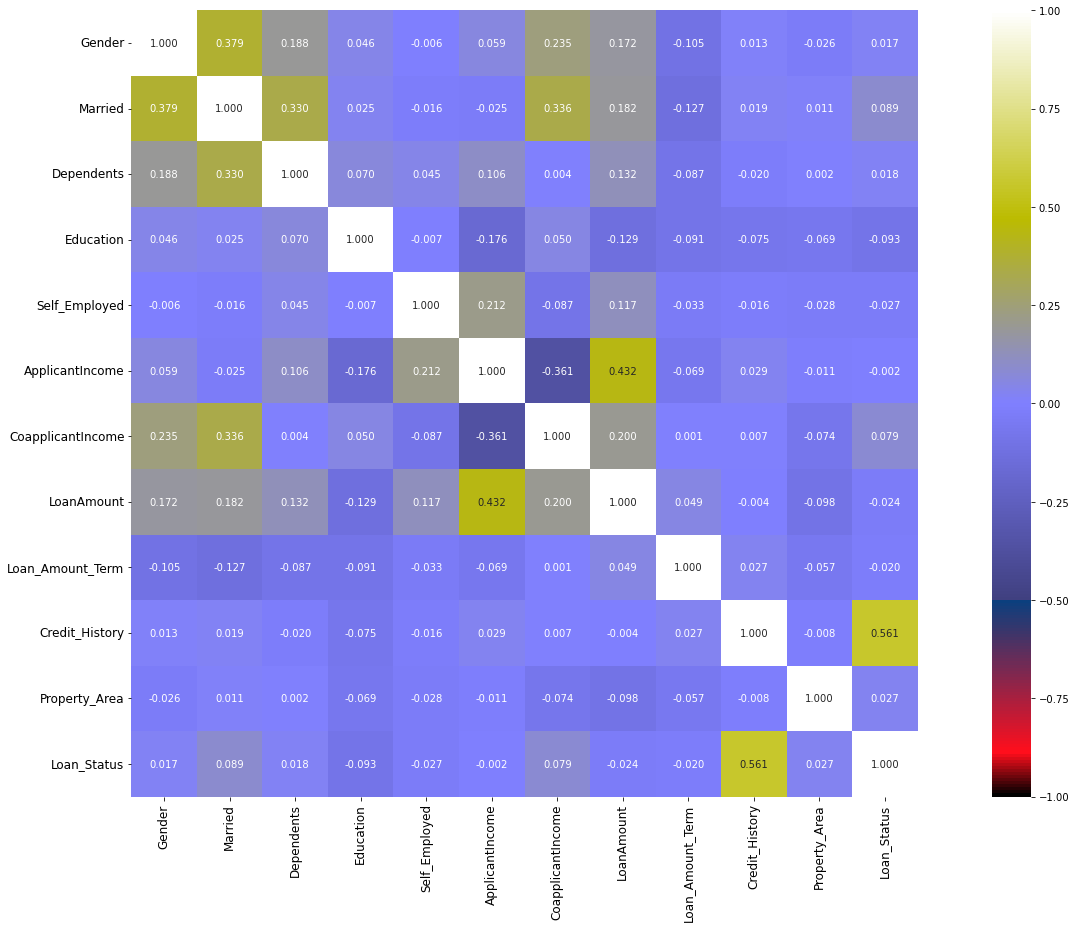

In [41]:
# Plotting correlation

plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

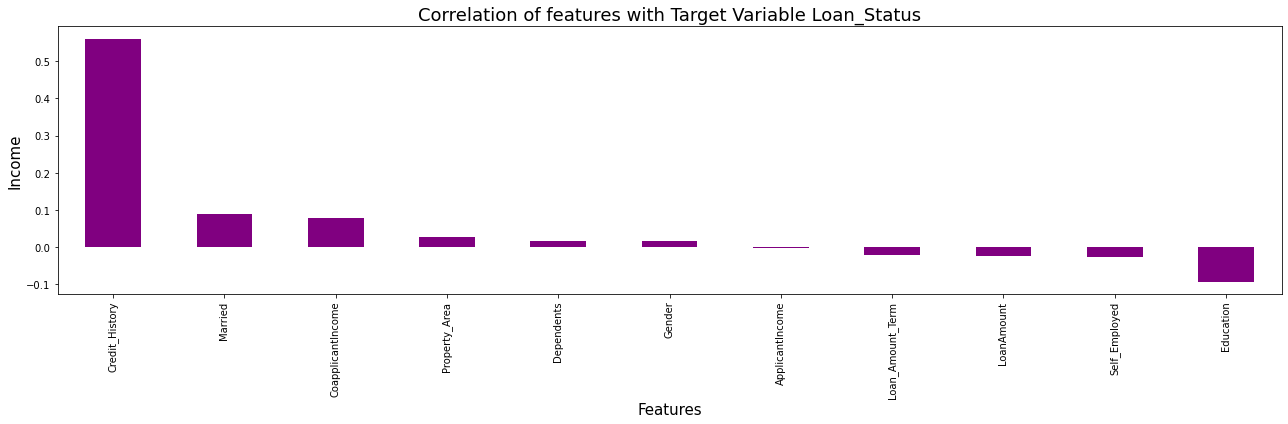

In [42]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

In [43]:
# Checking Multicollinearity between features using Varience Inflation factor
# Importing necessary liabrary

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [44]:
vif= pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df.values, i) for i in range (df.shape[1])]
vif['Features']=df.columns
vif

,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


In [45]:
# Balancing Imbalanced target feature

df.Loan_Status.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [46]:
# Balancing using SMOTE
# Importing necessary liabrary

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [47]:
# Splitting data in target and dependent features

X= df.drop(['Loan_Status'], axis=1)
Y= df['Loan_Status']

In [48]:
# Oversampling using SMOTE Techniques

oversample = SMOTE()
X, Y = oversample.fit_resample(X,Y)

In [49]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [50]:
# Scaling the data using Statndard scalar
# Importing liabraby

from sklearn.preprocessing import StandardScaler

In [51]:
scalar = StandardScaler()
X_scale = scaler.fit_transform(X)

In [52]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2
1,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2
4,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2


In [72]:
# Model Building
# Importing necessary liabraries
! pip install --upgrade scikit-learn
! pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)

In [74]:
print('Training Features:', X_train.shape)
print('Target Vector size:', Y_train.shape)
print('Test Features:', X_test.shape)
print('Test target vector size:', Y_test.shape)

Training Features: (557, 11)
Target Vector size: (557,)
Test Features: (239, 11)
Test target vector size: (239,)


In [56]:
# Finding Best Random State

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

maxAccu=0
maxRS=0

for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg = LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred = log_reg.predict(X_test)
    acc = accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8242677824267782 on Random_state 68


In [75]:
# Building logistic Regression Model

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=68, test_size=.3)
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred = log_reg.predict(X_test)

print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8242677824267782


Confusion matrix of Logistics Regression : 
 [[ 71  31]
 [ 11 126]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.87      0.70      0.77       102
           1       0.80      0.92      0.86       137

    accuracy                           0.82       239
   macro avg       0.83      0.81      0.81       239
weighted avg       0.83      0.82      0.82       239



In [76]:
# Applying other Classification algorithm

from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        XGBClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (F:\Anaconda\lib\site-packages\sklearn\metrics\__init__.py)

In [77]:
# Cross Validation

from sklearn.model_selection import cross_val_score

model =[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        XGBClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    



Cross Validation Score LogisticRegression() :

Score : [0.71875    0.71069182 0.74213836 0.7672956  0.79874214]
Mean Score : 0.7475235849056604
Std deviation : 0.03233503085758382




Cross Validation Score SVC() :

Score : [0.69375    0.75471698 0.7672956  0.72955975 0.81761006]
Mean Score : 0.7525864779874214
Std deviation : 0.04108752913035268




Cross Validation Score GaussianNB() :

Score : [0.6875     0.71069182 0.78616352 0.74842767 0.79245283]
Mean Score : 0.7450471698113208
Std deviation : 0.04108830831680728




Cross Validation Score DecisionTreeClassifier() :

Score : [0.7875     0.72327044 0.74842767 0.77358491 0.74213836]
Mean Score : 0.7549842767295597
Std deviation : 0.022878066296945693




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.74375    0.7672956  0.74213836 0.72327044 0.79245283]
Mean Score : 0.7537814465408805
Std deviation : 0.023854647204846126




Cross Validation Score RandomForestClassifier() :

Score : [0.79375    0.7672956

In [78]:
# Hyper Parameter Tuning - GridSearchCV

from sklearn.model_selection import GridSearchCV

parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [79]:
GCV = GridSearchCV(RandomForestClassifier(), parameter,verbose=10)
GCV.fit(X_train, Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5; 1/16

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [68]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'log2',
 'n_estimators': 70}

In [80]:
# Final Model

Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 70, max_depth=60 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred = Final_mod.predict(X_test)

print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8577405857740585


In [70]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (F:\Anaconda\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
# Saving Model

import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')